# Principal Component Analysis

__Principal Component Analysis (PCA)__ is a simple and effective, unsupervised dimensionality reduction algorithm that preserves as much of the information in the data as possible (as measured by least-squares reconstruction error).
 
PCA learns a representation:
-  that has lower dimensionality than the original input.
-  whose elements have no linear correlation with each other.

This is a first step toward statiticall independence. To achieve full independence, the nonlinear relationships must also be removed.

In the new, lower dimensionality subspace, the orthogonal axes (principal components) can be interpreted as the directions of maximum variance. Usually, the first few principal components encompass most of the variance. This is how we achieve dimensionality reduction.

![PCA](images/pca.PNG)


## PCA Algorithm



Let $\mathbf X=\begin{bmatrix} \mathbf x^{(1)} \\ \vdots \\ \mathbf x^{(m)} \end{bmatrix},\,\,$ where $\mathbf x = [x_1,...,x_d],\,\,$ be the $d$-dimensional input dataset.

Let's assume that $\forall_n \mathbb E[x_n]=0,\,\,$. If this is not the case the data should be preprocessed by substracting the mean from all examples.

Then the unbiased sample covariance matrix associated with $\mathbf X$ is given by:

$\Sigma = \dfrac{1}{m-1}\mathbf X^T \mathbf X$

PCA finds a representation:

$\mathbf z = \mathbf x \mathbf W,\,\, \mathbf z=[z_1,...,z_k]$

Where $\mathbf W\in \mathbb R^{dxk}$ is a projection matrix constructed from $k$ eigenvectors of $\Sigma$, which correspond to the $k$ largest eigenvalues.

$\mathbf W = \begin{bmatrix} \textbf v_1 \\ \vdots \\ \textbf v_k \end{bmatrix}$


Recall that $\Sigma \mathbf v= \lambda \mathbf v,\,\,\,$, where $\lambda$ is the eigenvalue of the eigenvector.



## Building projection matrix $\mathbf W$

The flow of the PCA algorithm can be summarized as follows:

1. Standardize the d-dimensional input dataset
2. Construct the covariance matrix
3. Decompose the covariance matrix into its eigenvectors and eigenvalues
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
5. Select $k$ eigenvectors which correspond to the $k$ largers eigenvalues
6. Construct the projection matrix $W$ by concatenating the "top" $k$ eigenvectors
7. Transform the input dataset using the projection matrix $W$ to obtain the new $k$-dimensional feature space


In [7]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.36951469,  0.18434927,  0.11815159,  0.07334252,  0.06422108,
        0.05051724,  0.03954654,  0.02643918,  0.02389319,  0.01629614,
        0.01380021,  0.01172226,  0.00820609])

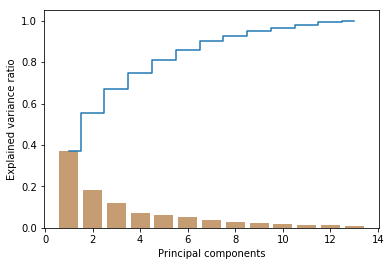

In [10]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

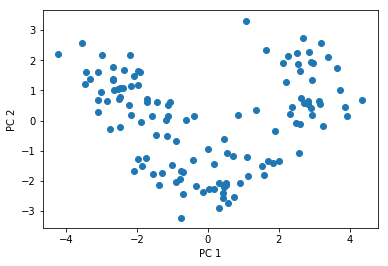

In [11]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

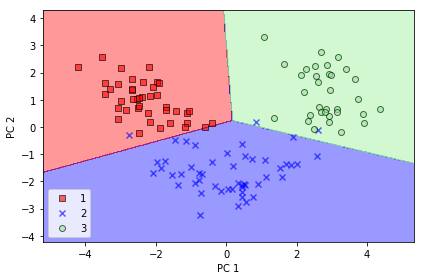

In [13]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

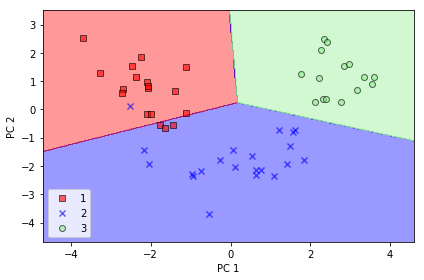

In [14]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()